#### Dans notre jeu de données chaque individu présente les variables suivantes:

- <span style="color: purple;">Age</span>: Age of the gym member. 
- <span style="color: purple;">Gender</span>: Gender of the gym member (Male or Female).
- <span style="color: purple;">Weight (kg)</span>: Member’s weight in kilograms.
- <span style="color: purple;">Height (m)</span>: Member’s height in meters.
- <span style="color: purple;">Max_BPM</span>: Maximum heart rate (beats per minute) during workout sessions.
- <span style="color: purple;">Avg_BPM</span>: Average heart rate during workout sessions.
- <span style="color: purple;">Resting_BPM</span>: Heart rate at rest before workout.
- <span style="color: purple;">Session_Duration (hours)</span>: Duration of each workout session in hours.
- <span style="color: purple;">Calories_Burned</span>: Total calories burned during each session.
- <span style="color: purple;">Workout_Type</span>: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
- <span style="color: purple;">Fat_Percentage</span>: Body fat percentage of the member.
- <span style="color: purple;">Water_Intake (liters)</span>: Daily water intake during workouts.
- <span style="color: purple;">Workout_Frequency (days/week)</span>: Number of workout sessions per week.
- <span style="color: purple;">Experience_Levle</span>: Level of experience, from beginner (1) to expert (3).
- <span style="color: purple;">BMI</span>: Body Mass Index, calculated from height and weight.


In [37]:
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(gplots)
library(graphics)
library(scales)
library(dplyr)
library(patchwork)

In [2]:
path <- ""
Gym <- read.table(paste(path, "Donnees_projet.csv", sep = ""),
                    sep = ",", header = TRUE)

Gym[,"Gender"]<- as.factor(Gym[,"Gender"])
Gym[,"Workout_Type"]<-as.factor(Gym[,"Workout_Type"])
Gym[,"Workout_Frequency"]<-as.factor(Gym[,"Workout_Frequency..days.week."])
Gym[,"Experience_Level"]<-as.factor(Gym[,"Experience_Level"])
Gym[,"Session_Duration"]<-Gym[,"Session_Duration..hours."]
Gym[,"Water_Intake"]<-Gym[,"Water_Intake..liters."]

Gym<-Gym[, c(1:7, 9:11,14:18)]

head(Gym)
summary(Gym)

,Age,Gender,Weight..kg.,Height..m.,Max_BPM,Avg_BPM,Resting_BPM,Calories_Burned,Workout_Type,Fat_Percentage,Experience_Level,BMI,Workout_Frequency,Session_Duration,Water_Intake
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
1,56,Male,88.3,1.71,180,157,60,1313,Yoga,12.6,3,30.20,4,1.69,3.5
2,46,Female,74.9,1.53,179,151,66,883,HIIT,33.9,2,32.00,4,1.30,2.1
3,32,Female,68.1,1.66,167,122,54,677,Cardio,33.4,2,24.71,4,1.11,2.3
4,25,Male,53.2,1.70,190,164,56,532,Strength,28.8,1,18.41,3,0.59,2.1
5,38,Male,46.1,1.79,188,158,68,556,Strength,29.2,1,14.39,3,0.64,2.8
6,56,Female,58.0,1.68,168,156,74,1116,HIIT,15.5,3,20.55,5,1.59,2.7


      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :255  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :221  
 Median :143.0   Median :62.00   Median : 893.0   Strength:258  
 Mean   :143.8   Mean   :62.22   Mean   : 905.4   Yoga    :239  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1076.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

Dans ce jeu de données on observe 11 variables quantitatives et 4 variables qualitatives. pour traiter les données correctement nous avons transformés les données qualitatives en facteur et nous avons renommé les colonnes dont le nom était trop long ou pas assez intuitif. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


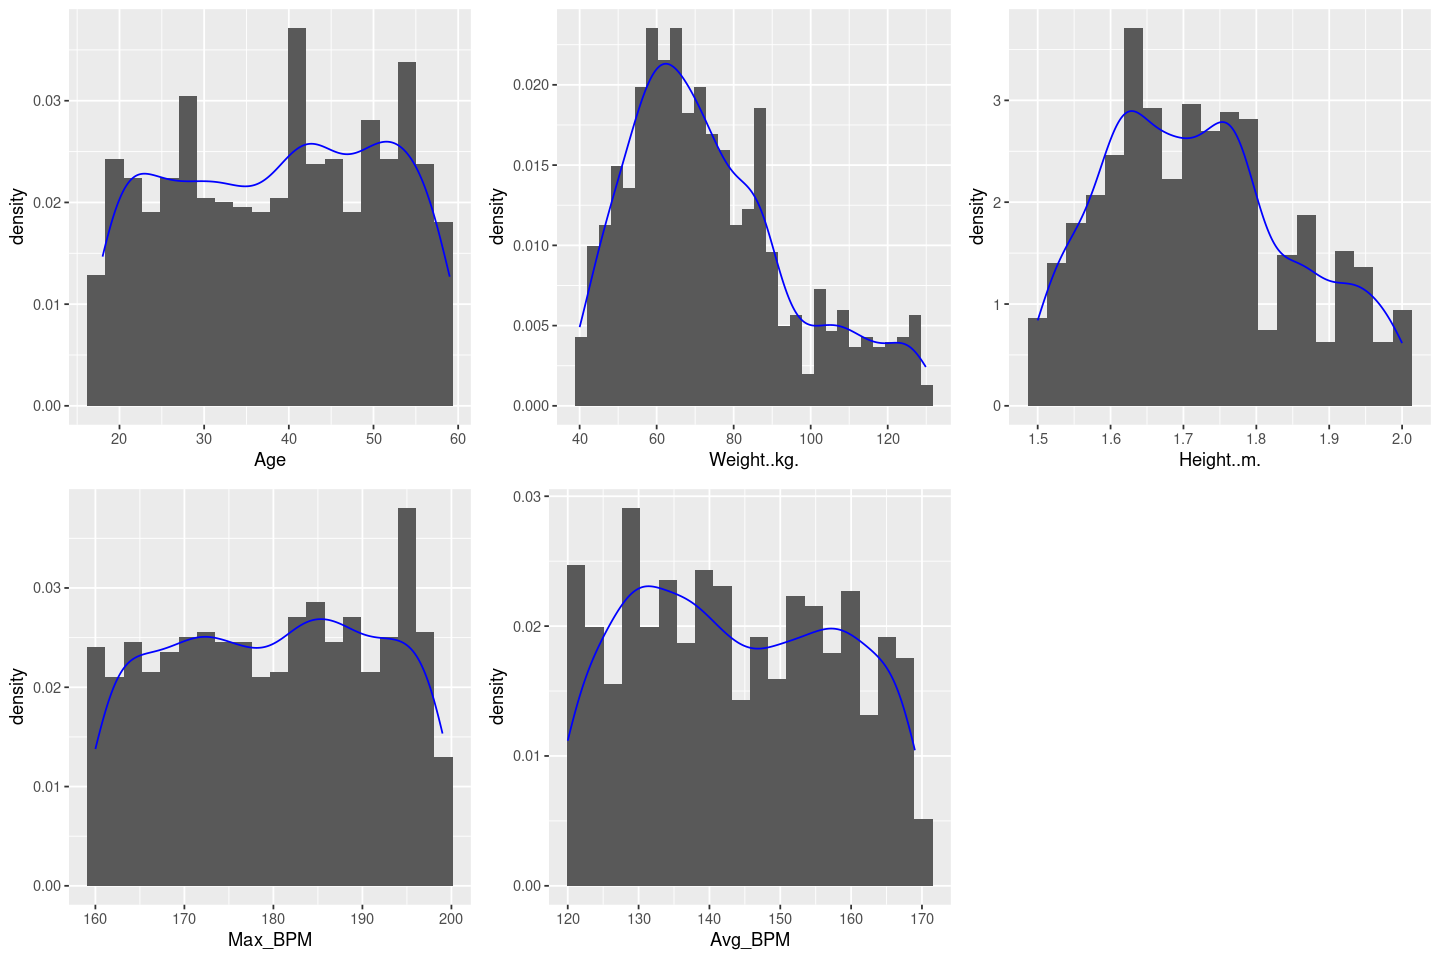

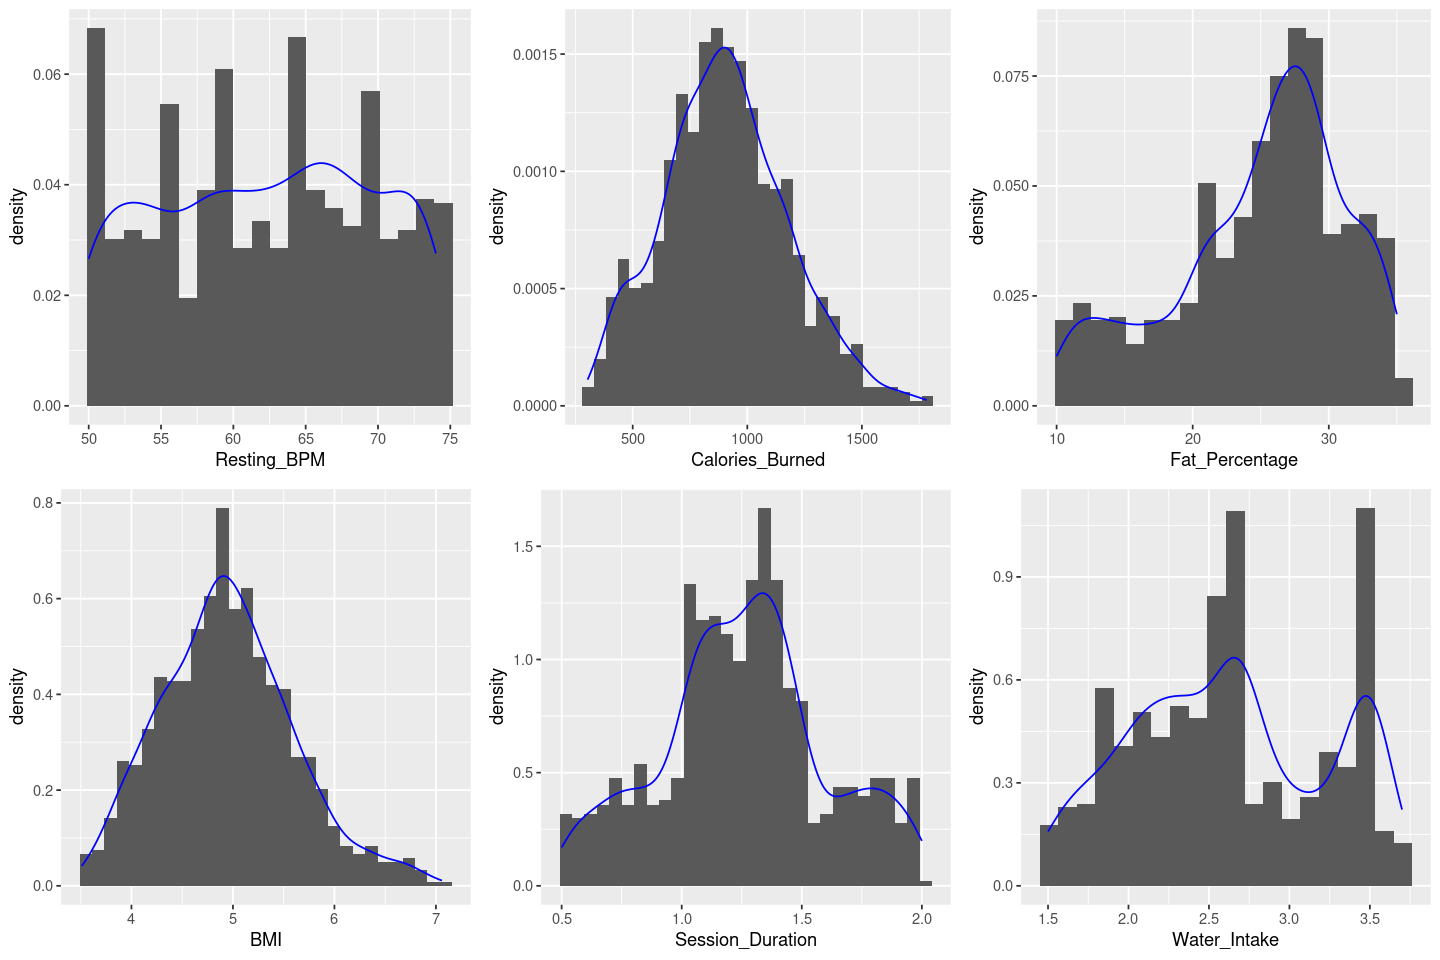

In [10]:
g1<-ggplot(Gym,aes(x=Age))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
g2<-ggplot(Gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g3<-ggplot(Gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g4<-ggplot(Gym,aes(x=Max_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g5<-ggplot(Gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g6<-ggplot(Gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g7<-ggplot(Gym,aes(x=Calories_Burned))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(Gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
g9<-ggplot(Gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g10<-ggplot(Gym,aes(x=Session_Duration))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g11<-ggplot(Gym,aes(x=Water_Intake))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")

options(repr.plot.width = 12, repr.plot.height = 8)
grid.arrange(g1,g2,g3,g4,g5,ncol=3)
grid.arrange(g6,g7,g8,g9,g10,g11,ncol=3)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


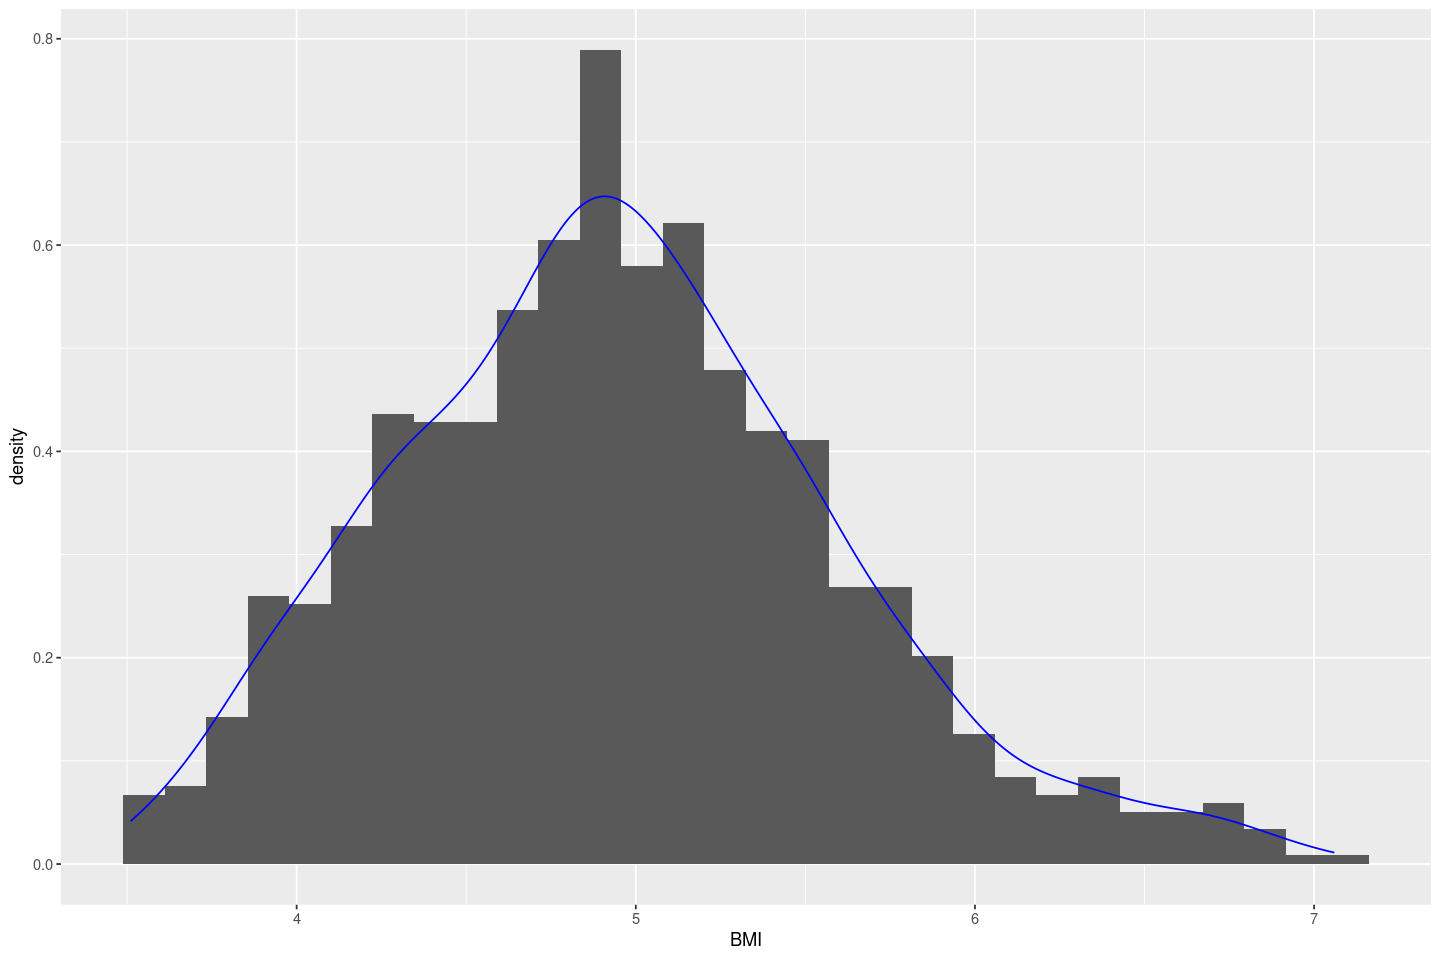

In [4]:
Gym[,"BMI"]<-sqrt(Gym[,"BMI"])

g9b<-ggplot(Gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")

grid.arrange(g9b,ncol=1)

En essayant des transformations des variables quantitatives on se rend compte qu'elles ne sont pas forcément pertinentes. Il faudrait se renseigner sur d'autres transformations pour des variables plus complexes et distribuées moins uniformément 

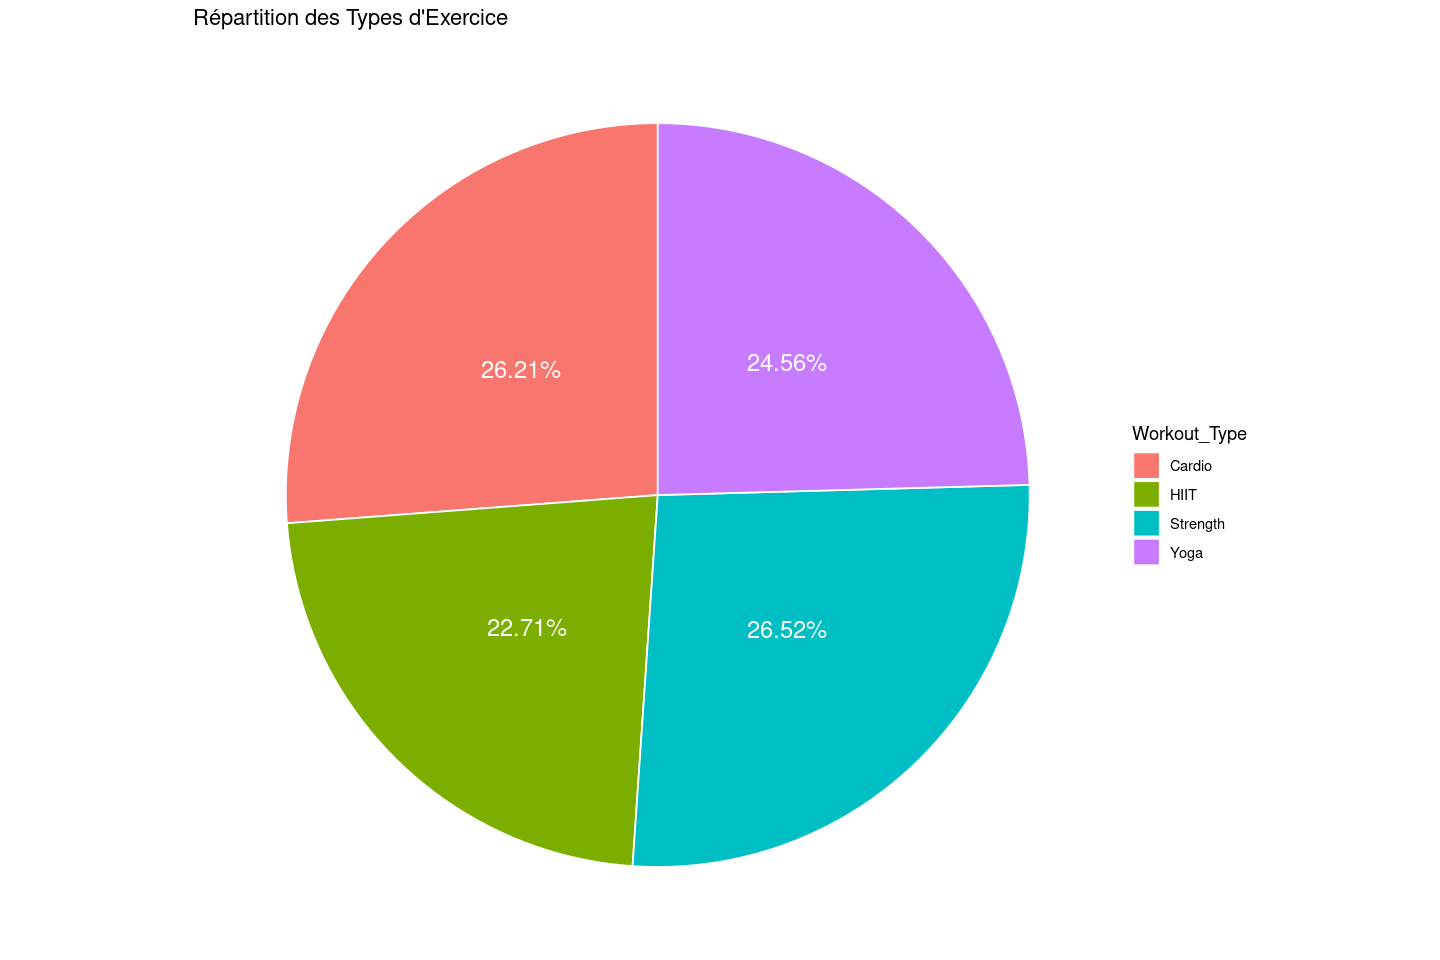

In [38]:
ggplot(Gym, aes(x = "", fill = Workout_Type)) +
  geom_bar( width = 1, color="white") +
  coord_polar(theta = "y") +
  labs(title = "Répartition des Types d'Exercice") + 
    geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :255  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :221  
 Median :143.0   Median :62.00   Median : 893.0   Strength:258  
 Mean   :143.8   Mean   :62.22   Mean   : 905.4   Yoga    :239  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1076.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

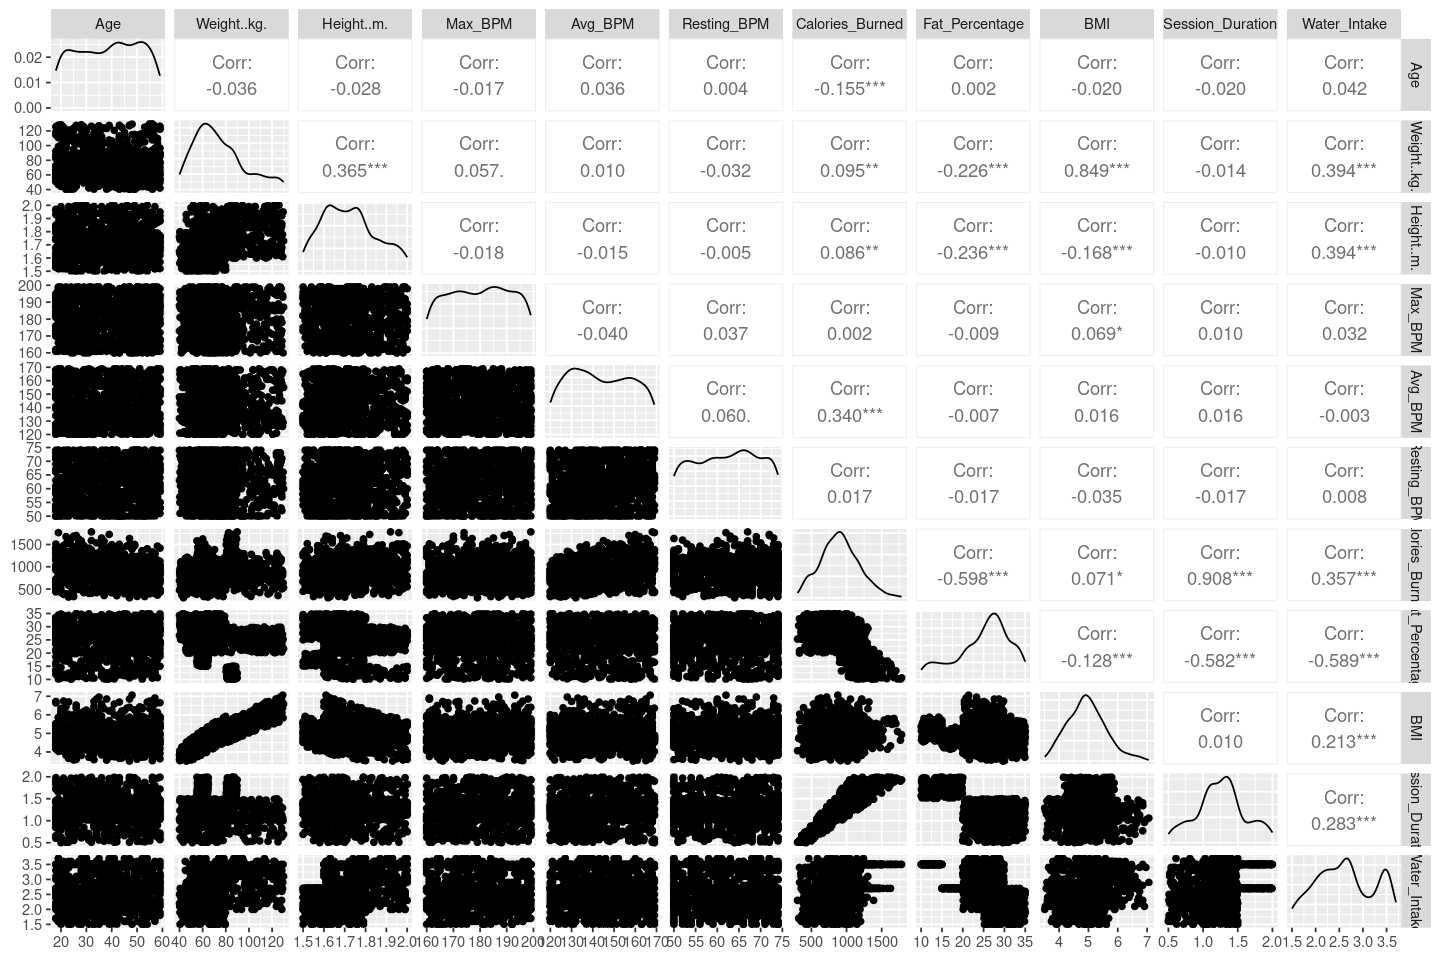

In [5]:
summary(Gym)
ggpairs(Gym[, c(1,3:8,10,12,14:15)])

On remarque facilement plusieurs corrélations linéaires très fortes, notamment entre le poids et l'IMC ( avec une corrélation de 0.852) et entre la durée de la session et les calories brulées (corrélation = 0.912) 
Ces liens s'établissent de façon évidentes par leur nature. 
D'un autre côté, on observe des comportements atypiques qui semblent établir des relations non linéaires entre les variables Durée de la séance et le pourcentage de masse graisseuse. ces deux variables semblent établir des seuils entre elles. 
Pour des variables comme Consommation d'eau on retrouve les pics observés dans les histogrammes précédents. 

A faire: Trouver la commande qui détermine l'indice des individus chelous dans fat percentage/ Water intake
Voir globalement si on peut analyser plus les pics de water intake?

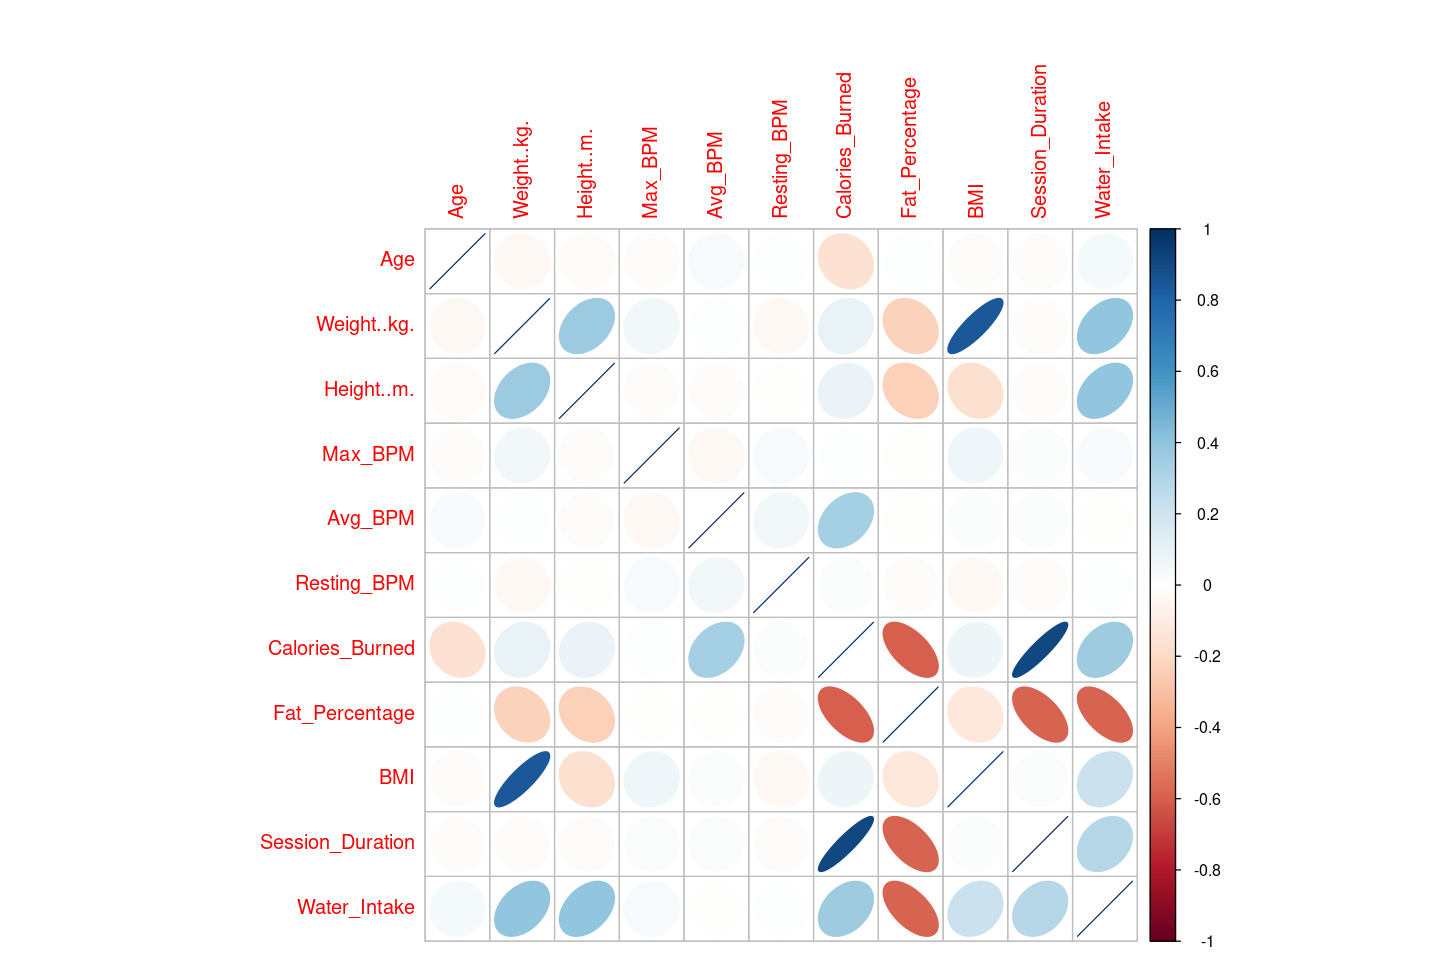

In [19]:
library(corrplot)
corrplot(cor(Gym[, c(1,3:8,10,12,14:15)]),method="ellipse")

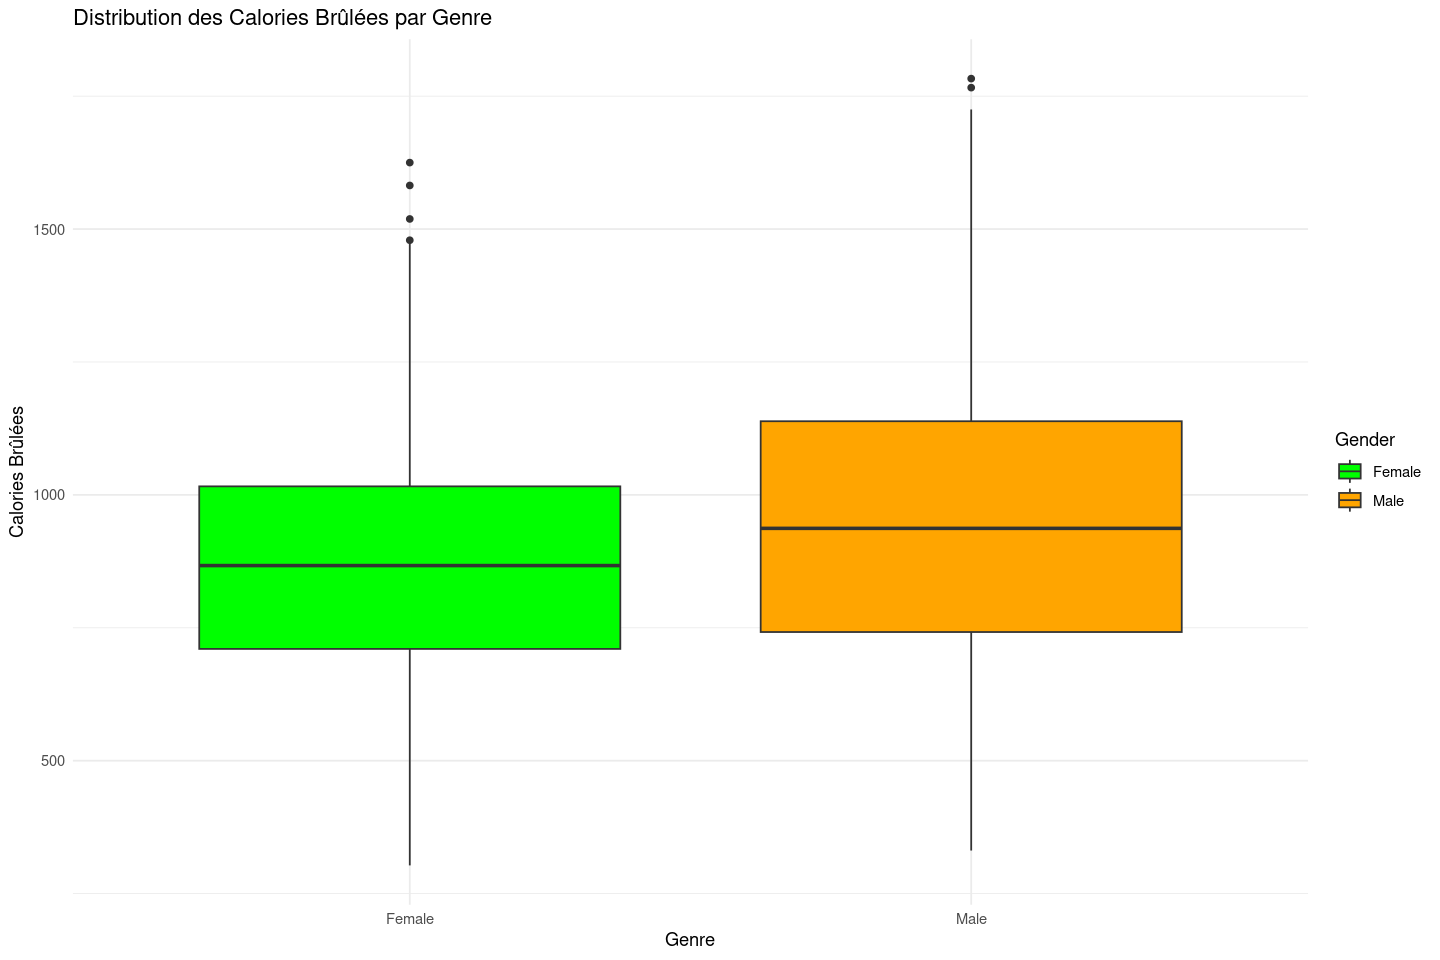

In [22]:
ggplot(Gym, aes(x = Gender, y = Calories_Burned, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Distribution des Calories Brûlées par Genre",
       x = "Genre",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("Male" = "orange", "Female" = "green"))

On remarque assez facilement une légère différence entre les calories brulées chez les femmes et celles chez les hommes. 

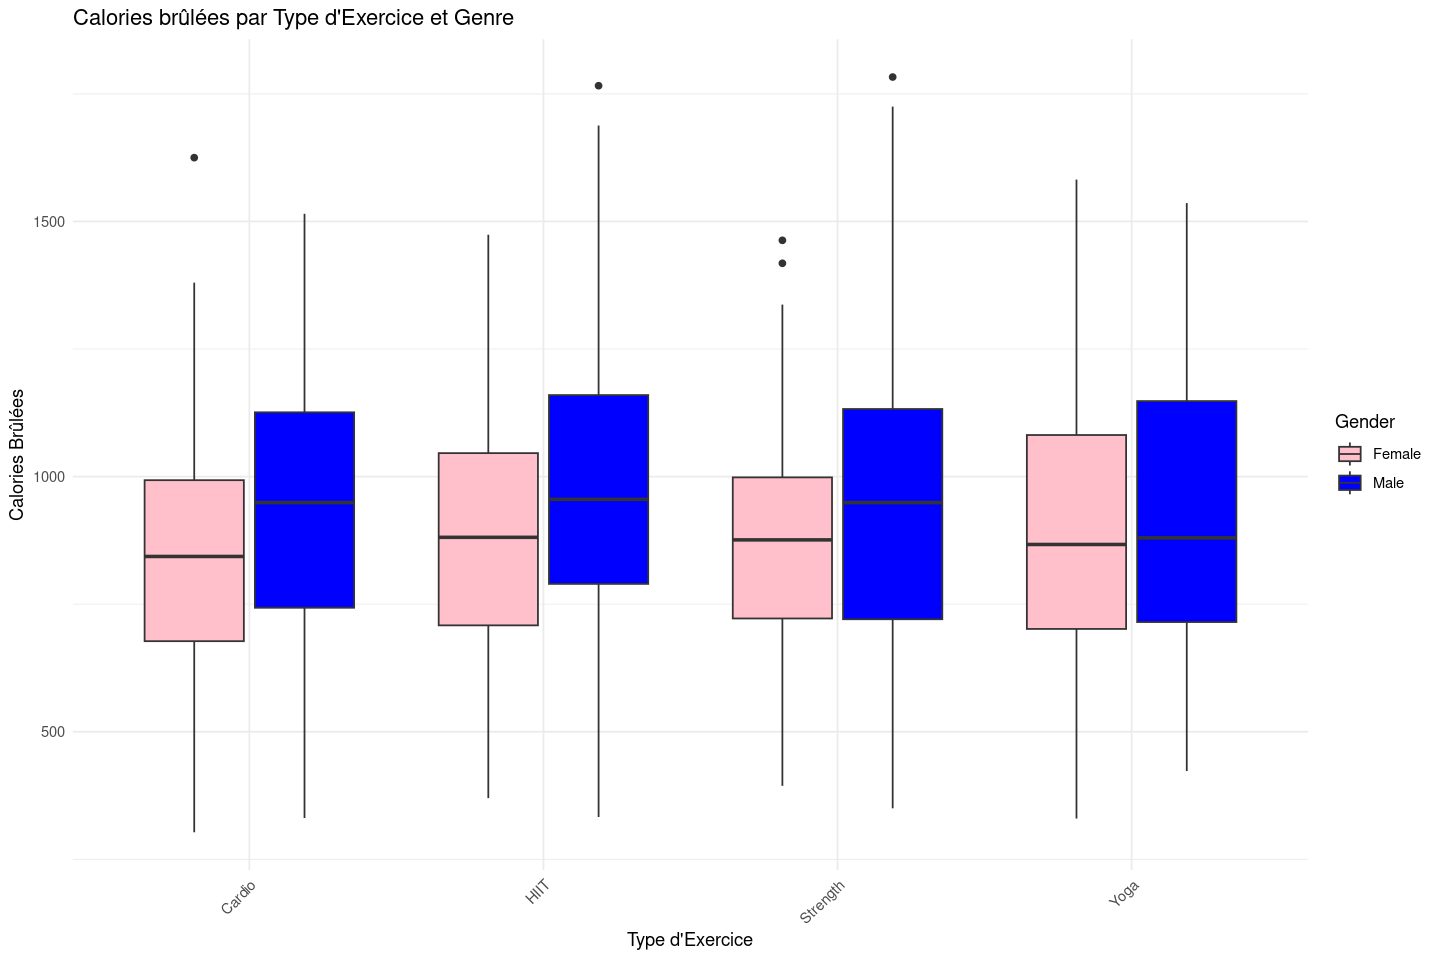

In [28]:
ggplot(Gym, aes(x = Workout_Type, y = Calories_Burned, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Calories brûlées par Type d'Exercice et Genre",
       x = "Type d'Exercice",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("Male" = "blue", "Female" = "pink")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

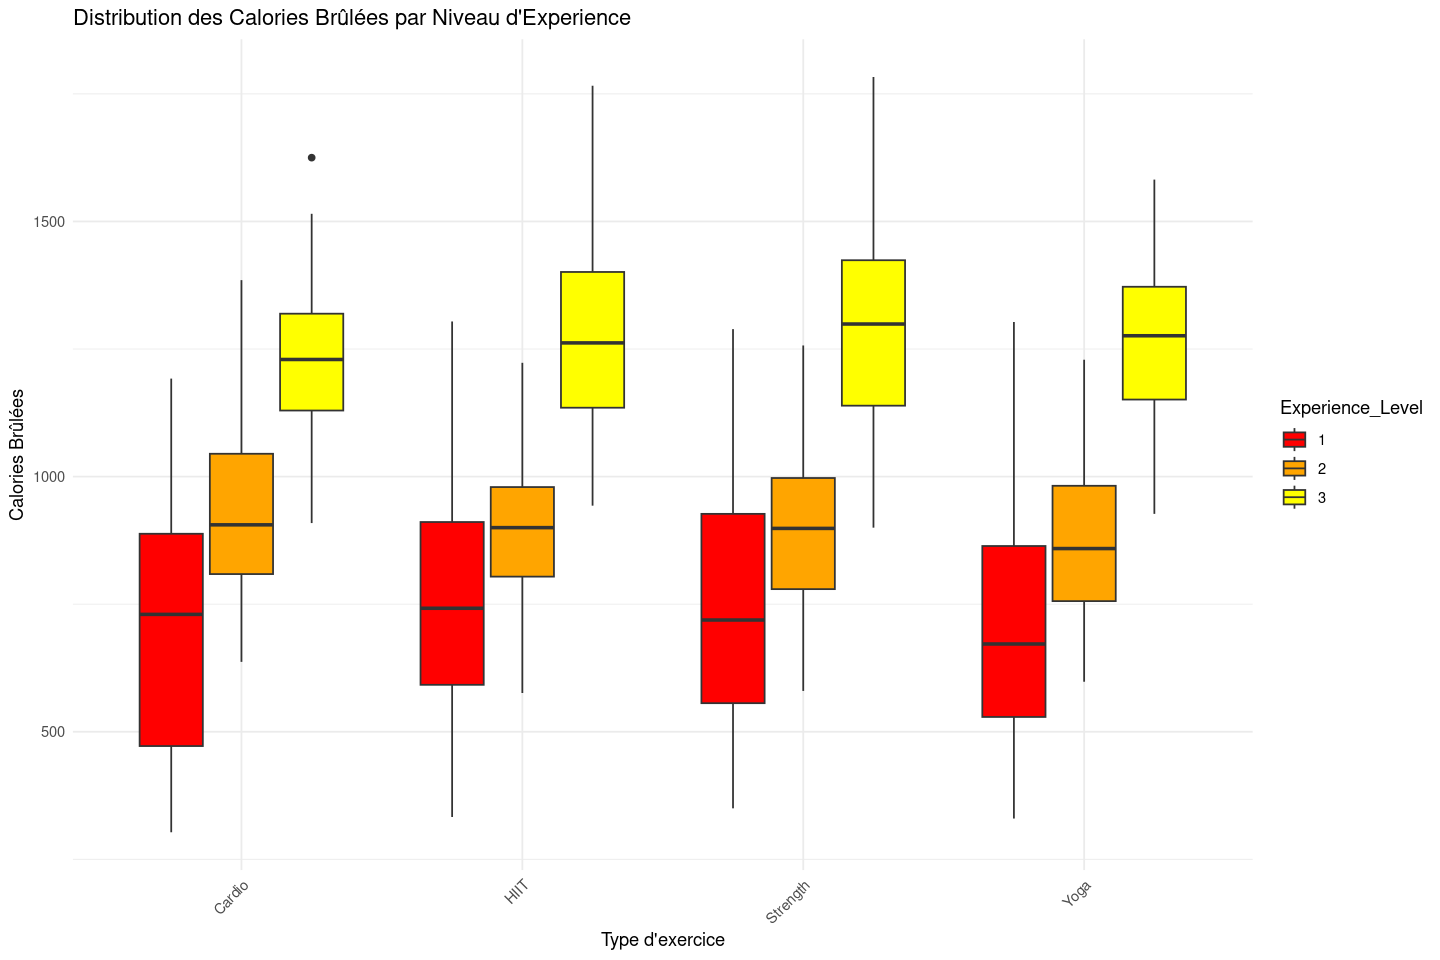

In [45]:
ggplot(Gym, aes(x = Workout_Type, y = Calories_Burned, fill = Experience_Level)) +
  geom_boxplot() +
  labs(title = "Distribution des Calories Brûlées par Niveau d'Experience",
       x = "Type d'exercice",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("1" = "red", "2" = "orange", "3"="yellow"))+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Nous voyons de façon évidente qu'à un niveau d'experience plus élevée est souvent associées un plus grand nombre de calories brulées, cela est sûrement dû à l'intensité et à la durée d'exercice qui devrait augmenter avec l'expérience nous allons à présent le vérifier. 

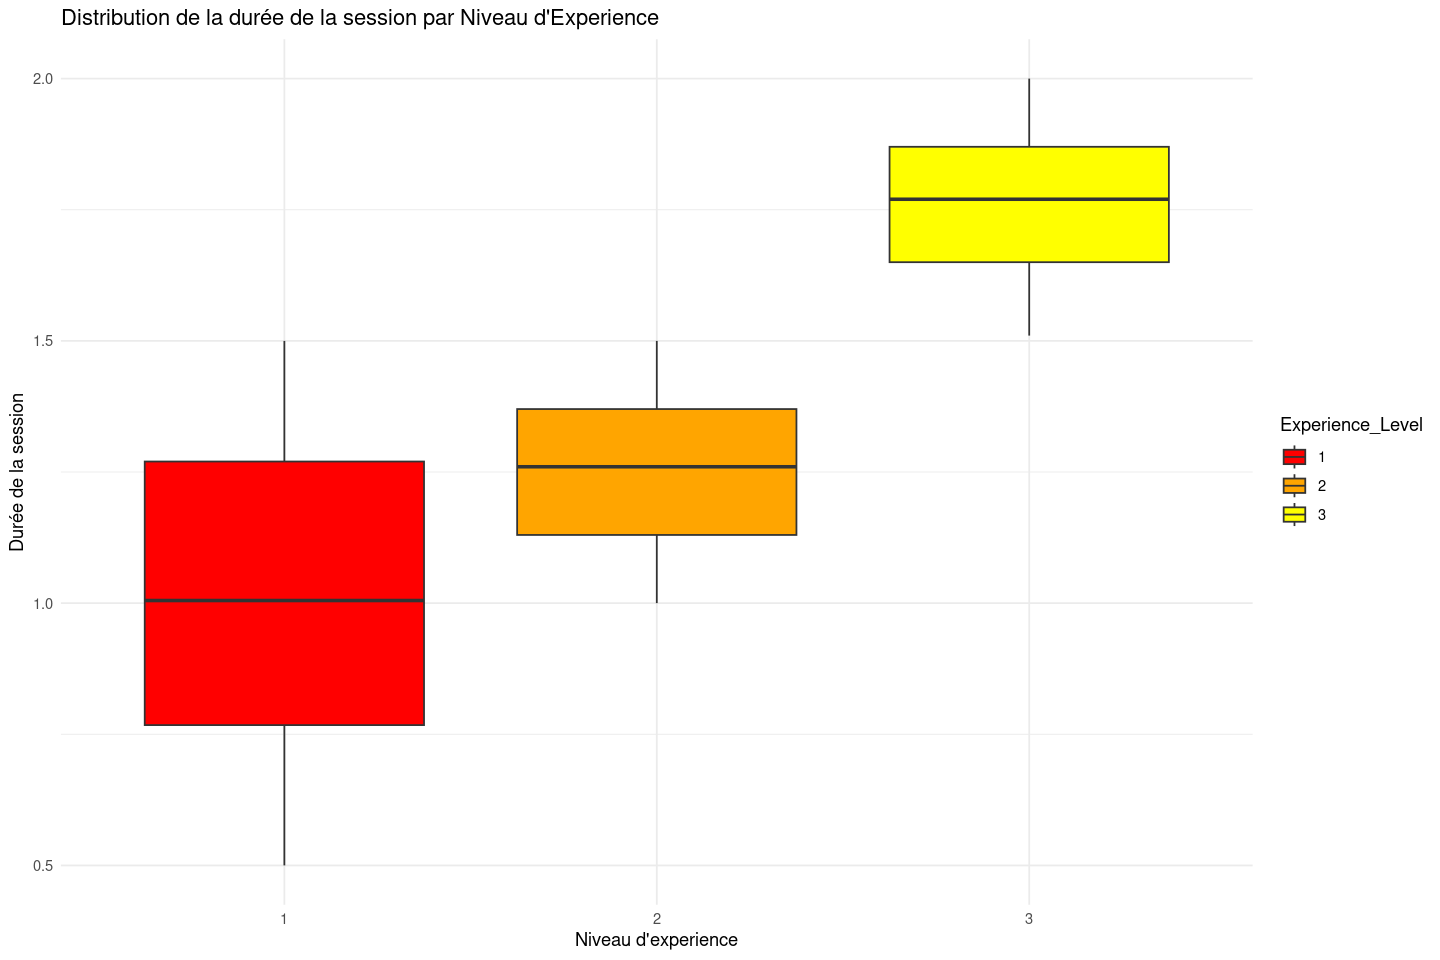

In [24]:
ggplot(Gym, aes(x = Experience_Level, y = Session_Duration, fill = Experience_Level)) +
  geom_boxplot() +
  labs(title = "Distribution de la durée de la session par Niveau d'Experience",
       x = "Niveau d'experience",
       y = "Durée de la session") +
  theme_minimal() +
  scale_fill_manual(values = c("1" = "red", "2" = "orange", "3"="yellow"))

Warning message:
“... is ignored in group_split(<grouped_df>), please use group_by(..., .add =
TRUE) %>% group_split()”


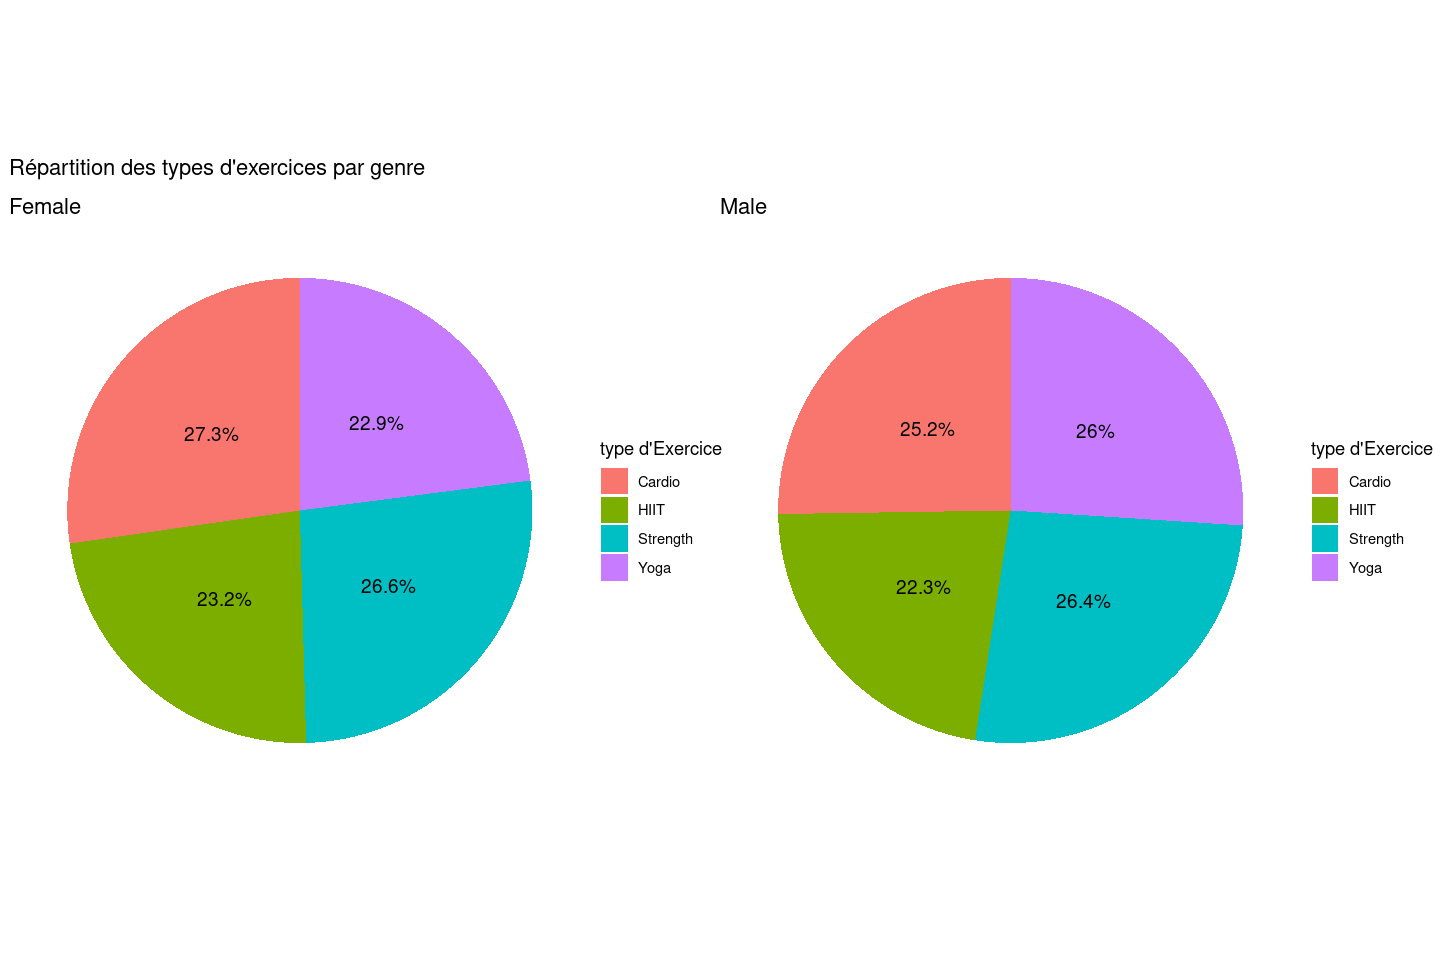

In [44]:
df_pie <- Gym %>%
  count(Gender, Workout_Type) %>%  # Compte les occurrences
  group_by(Gender, .add = TRUE) %>%
  mutate(Prop = n / sum(n), Label = paste0(round(Prop * 100, 1), "%"))

plot_pie <- function(Gym) {
  ggplot(Gym, aes(x = "", y = Prop, fill = Workout_Type)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    labs(title = unique(Gym$Gender), fill = "type d'Exercice") +
    theme_void() +
    theme(legend.position = "right") +
    geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 4)
}

plots <- df_pie %>%
  group_split(Gender) %>%
  lapply(plot_pie)

wrap_plots(plots) + plot_annotation(title = "Répartition des types d'exercices par genre")